<a href="https://colab.research.google.com/github/balaajhi/One-step-at-a-time/blob/main/Forecasting_with_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install Prophet
%pip install yfinance

     |████████████████████████████████| 65 kB 1.2 MB/s 
     |████████████████████████████████| 49 kB 2.3 MB/s 
     |████████████████████████████████| 43 kB 1.7 MB/s 
  Created wheel for Prophet: filename=prophet-1.0.1-py3-none-any.whl size=6638941 sha256=53c94500b7d8f76bb421b30c414bc8a6abf442d48e0569bc2f0647f5f410d4a3
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built Prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.
     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 6.4 MB 11.6 M

In [ ]:
import pandas as pd
from prophet import Prophet
import pandas as pd
import yfinance as yf
import numpy as np
from datetime import date
start = date(2017, 1, 1)
end = date.today()
data = pd.DataFrame()
interval = "1m"
ticker = 'AC.TO'
df= yf.download(ticker,start,end)
data['Close']= df[['Adj Close']]
data


[*********************100%***********************]  1 of 1 completed


,Close
Date,
2017-01-03,13.830000
2017-01-04,13.720000
2017-01-05,13.740000
2017-01-06,13.560000
2017-01-09,13.500000
...,...
2022-01-31,22.860001
2022-02-01,23.670000
2022-02-02,23.420000


In [ ]:
# df['DS']=data.index
df = pd.DataFrame({'ds':data.index,
                       'y':data['Close']})
df.reset_index(drop=True, inplace=True)
df

,ds,y
0,2017-01-03,13.830000
1,2017-01-04,13.720000
2,2017-01-05,13.740000
3,2017-01-06,13.560000
4,2017-01-09,13.500000
...,...,...
1274,2022-01-31,22.860001
1275,2022-02-01,23.670000
1276,2022-02-02,23.420000
1277,2022-02-03,23.059999


In [ ]:
df

,ds,y
0,2017-01-03,13.830000
1,2017-01-04,13.720000
2,2017-01-05,13.740000
3,2017-01-06,13.560000
4,2017-01-09,13.500000
...,...,...
1274,2022-01-31,22.860001
1275,2022-02-01,23.670000
1276,2022-02-02,23.420000
1277,2022-02-03,23.059999


In [ ]:
# Python
m = Prophet()
m.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1639,2023-01-31
1640,2023-02-01
1641,2023-02-02
1642,2023-02-03
1643,2023-02-04


In [ ]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
1639,2023-01-31,22.273588,0.251221,43.258942
1640,2023-02-01,22.197549,1.014916,42.485302
1641,2023-02-02,22.217073,0.556527,42.890663
1642,2023-02-03,22.253834,1.213188,43.213807
1643,2023-02-04,23.907545,2.128140,44.873327


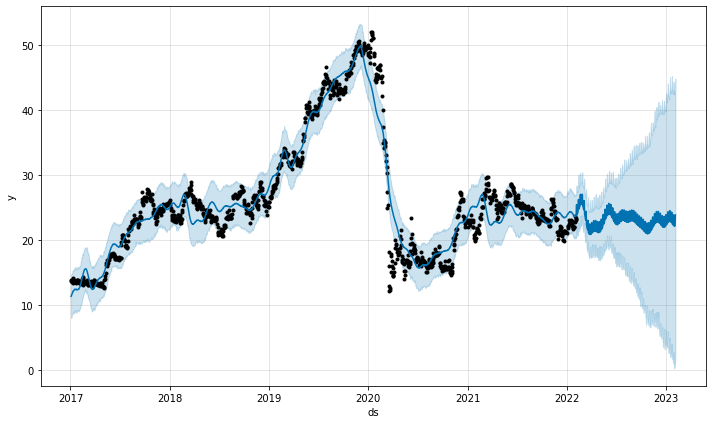

In [ ]:
fig1 = m.plot(forecast)


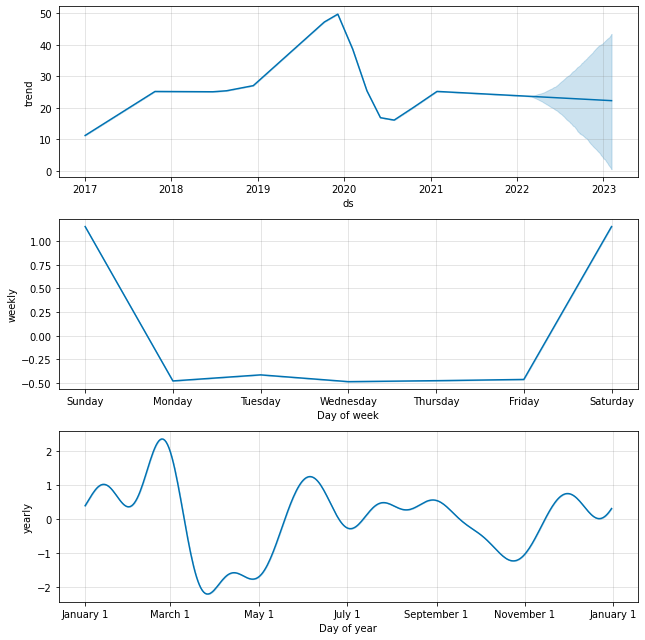

In [ ]:
# Python
fig2 = m.plot_components(forecast)

In [ ]:
# Python
from prophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

In [ ]:
# Python
plot_components_plotly(m, forecast)